<a href="https://colab.research.google.com/github/Akshiiiita/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

**Y=wX+b**

*   Y -> Dependent variable
*   X -> Independent variable
*   w -> weight
*   b -> bias



**Gradient Descent**

*   w = w - Ldw
*   b = b - Ldb

L is **Learning Rate**



In [1]:
# importing numpy library
import numpy as np

Linear regression model

In [2]:
class linear_regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    # (m) - no. of training examples and (n) - no. of features
    self.m,self.n = X.shape # no. of rows & no.of columns

    # initialising the weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_pred = self.predict(self.X)

    # calculate gradients
    dw = - (2* (self.X.T).dot(self.Y - Y_pred)) / self.m
    db = - 2 * np.sum(self.Y - Y_pred) / self.m

    # update weights and bias
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return X.dot(self.w) + self.b

Using linear regression model for prediction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data pre-processing

In [4]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [5]:
# printing the first five columns of dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [8]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and target

In [9]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the datasets into trainig and testing data

In [12]:
# common step do in all projects
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

Training the linear regression model

In [25]:
model = linear_regression(learning_rate= 0.02,no_of_iterations= 1000)

In [26]:
model.fit(X_train,Y_train)

In [27]:
# printing the parameter values
print('weight: ',model.w[0])
print('bias: ',model.b)

weight:  9514.400999035135
bias:  23697.406507136307


y = 9514(x)+23697


salary = 9514(experience)+23697

Predict the salary value for test data

In [28]:
test_data_predict = model.predict(X_test)

In [29]:
print(test_data_predict)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicting and actual value

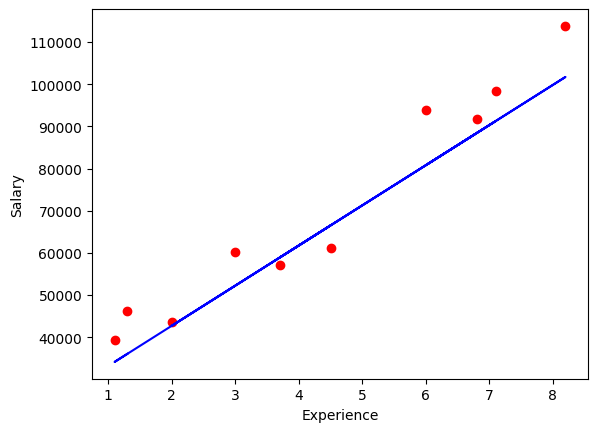

In [30]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_predict,color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()